In [4]:
# Script: buat_slide_antenna.py
# Men-generate slide PNG 2D layout antena mikrostrip (top view) beserta parameter.
# Jalankan di Jupyter Notebook atau Google Colab.

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

out_png = "./data uji1_model baru/optimal_antenna_slide.png"
# out_png = "./data uji1_model baru 10ghz/optimal_antenna_slide.png"

# out_png = "./data uji2_model baru/optimal_antenna_slide.png"
# out_png = "./data uji2_model baru 10ghz/optimal_antenna_slide.png"

# out_png = "./data test_model baru/optimal_antenna_slide.png"
# out_png = "./data test_model baru 10ghz/optimal_antenna_slide.png"

# -- Parameter contoh (ganti dengan hasil optimasi Anda jika ada) --
params = {
    "Frekuensi kerja": "10.0 GHz",
    "Substrat": "FR-4 (εr ≈ 4.4), h = 1.6 mm",
    "W_patch": 9.512027,    # mm
    "L_patch": 6.946606,    # mm
    "Feed width": 2.1031094,   # mm
    "Inset (x)": 2.35,   # mm
    "Ground plane": "30 × 30 mm",
    "Target": "S11 < -10 dB, Gain ~5–7 dBi, BW ±250–500 MHz"
}


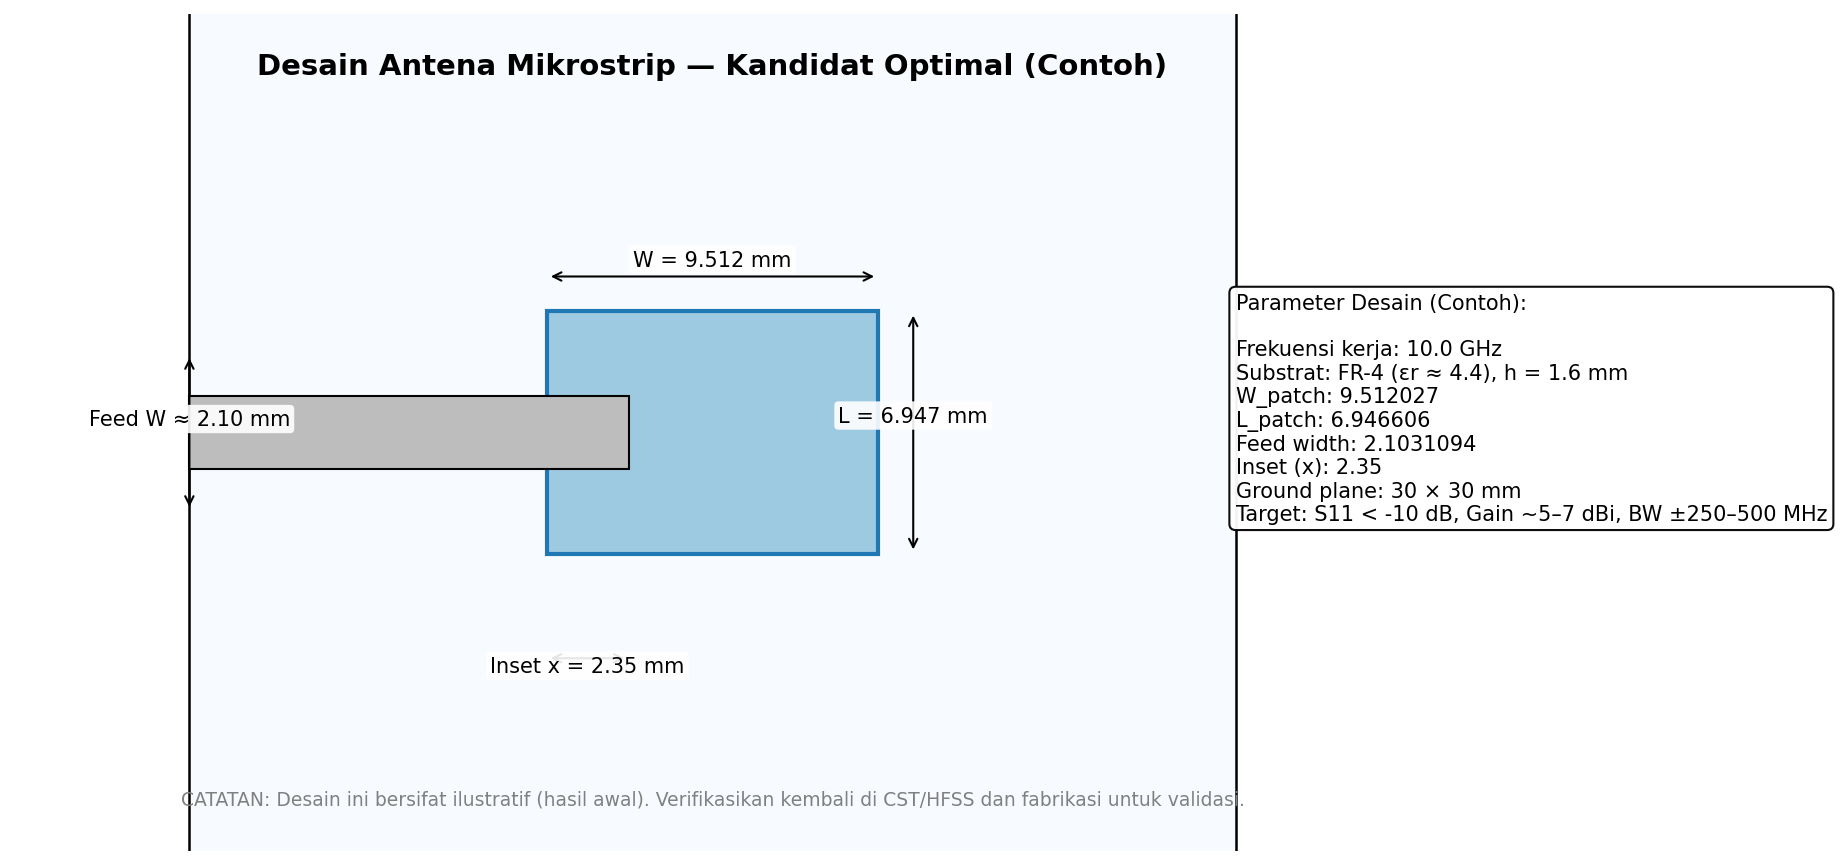

Selesai. File: ./data uji1_model baru/optimal_antenna_slide.png


In [5]:

fig_w, fig_h = 12, 8  # inches
dpi = 150
fig, ax = plt.subplots(figsize=(fig_w, fig_h), dpi=dpi)
ax.set_xlim(-20, 20)
ax.set_ylim(-12, 12)
ax.set_aspect('equal')
ax.axis('off')

ground_w = 30.0
ground_h = 30.0
ground_rect = patches.Rectangle((-ground_w/2, -ground_h/2), ground_w, ground_h,
                                linewidth=1.2, edgecolor='k', facecolor='#f7fbff')
ax.add_patch(ground_rect)

W = params["W_patch"]
L = params["L_patch"]
patch_rect = patches.Rectangle((-W/2, -L/2), W, L, linewidth=2.0, edgecolor='#1f77b4', facecolor='#9ecae1')
ax.add_patch(patch_rect)

feed_w = params["Feed width"]
inset_x = params["Inset (x)"]
feed_start_x = -ground_w/2
feed_end_x = -W/2 + inset_x
feed_rect = patches.Rectangle((feed_start_x, -feed_w/2), feed_end_x - feed_start_x, feed_w,
                              linewidth=1.0, edgecolor='k', facecolor='#bdbdbd')
ax.add_patch(feed_rect)

# Dimensions arrows and annotations
def draw_dim(x1, y1, x2, y2, text, offset=0.8):
    ax.annotate('', xy=(x1,y1), xytext=(x2,y2), arrowprops=dict(arrowstyle='<->', lw=1.0))
    mx, my = (x1+x2)/2, (y1+y2)/2
    ax.text(mx, my+offset, text, ha='center', va='bottom', fontsize=10, bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.9))

draw_dim(-W/2, L/2+1.0, W/2, L/2+1.0, f"W = {W:.3f} mm", offset=0.2)
draw_dim(W/2+1.0, -L/2, W/2+1.0, L/2, f"L = {L:.3f} mm", offset=0.2)
draw_dim(feed_start_x, -feed_w/2-1.2, feed_start_x, feed_w/2+1.2, f"Feed W ≈ {feed_w:.2f} mm", offset=0.1)
ax.annotate('', xy=( -W/2, -L/2 - 3.0), xytext=( -W/2 + inset_x, -L/2 - 3.0), arrowprops=dict(arrowstyle='<->', lw=1.0))
ax.text(-W/2 + inset_x/2, -L/2 - 3.5, f"Inset x = {inset_x:.2f} mm", ha='center', va='bottom', fontsize=10, bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.9))

ax.text(0, 10.5, "Desain Antena Mikrostrip — Kandidat Optimal (Contoh)", ha='center', va='center', fontsize=14, fontweight='bold')

param_text = "\n".join([f"{k}: {v}" for k,v in params.items()])
props = dict(boxstyle='round', facecolor='white', alpha=0.95)
ax.text(15, 4, "Parameter Desain (Contoh):\n\n" + param_text, fontsize=10, va='top', ha='left', bbox=props)

ax.text(0, -10.5, "CATATAN: Desain ini bersifat ilustratif (hasil awal). Verifikasikan kembali di CST/HFSS dan fabrikasi untuk validasi.", ha='center', va='center', fontsize=9, color='gray')

# Pastikan direktori ada
os.makedirs(os.path.dirname(out_png), exist_ok=True)

# Simpan dan tampilkan
plt.savefig(out_png, bbox_inches='tight', dpi=dpi)
plt.show()
print("Selesai. File:", out_png)
